## **BNB**

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Set a random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 200

# Number of features (binary)
n_features = 5

# Generate random binary features (0 or 1)
X = np.random.randint(0, 2, size=(n_samples, n_features))

# Generate a binary target variable (y) based on some simple rule
# For example, if more than 2 features are 1, then y=1, else y=0
y = (np.sum(X[:, :3], axis=1) > 1).astype(int)

print("First 5 samples of X (features):\n", X[:5])
print("\nFirst 5 samples of y (target):\n", y[:5])
print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

First 5 samples of X (features):
 [[0 1 0 0 0]
 [1 0 0 0 1]
 [0 0 0 0 1]
 [0 1 1 1 0]
 [1 0 1 1 1]]

First 5 samples of y (target):
 [0 0 0 1 1]

Shape of X: (200, 5)
Shape of y: (200,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
bnb_classifier = BernoulliNB()
bnb_classifier.fit(X_train, y_train)

BernoulliNB()

In [4]:
# Make predictions on the test set
y_pred = bnb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



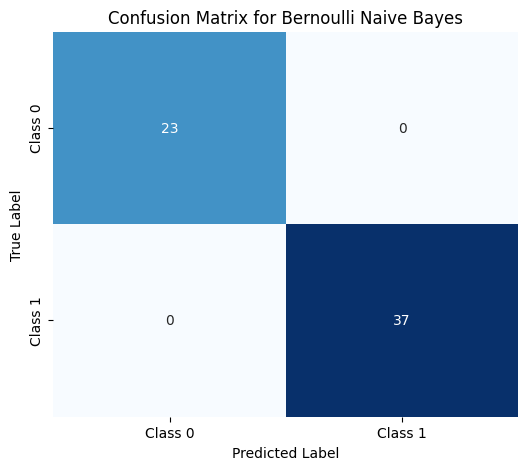

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Bernoulli Naive Bayes')
plt.show()

## **MNB**

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [25]:
data = {
   "text": [
        "I love this product, it's truly amazing and works perfectly!", "This is an excellent experience, highly recommended.", "I am very happy with the results.",
        "What a fantastic service, absolutely brilliant.", "The quality is superb, I am so pleased.", "I like it so much, it exceeded my expectations.",
        "This item is terrible, I hate it and it broke quickly.", "I am very sad about this purchase, it's horrible.", "What a bad experience, completely disappointed.",
        "Absolutely awful, a total waste of money.", "I dislike it a lot, the performance is poor.", "This is not what I expected, very frustrating.",
        "It's okay, not great but not bad either.", "Could be better, I'm a bit indifferent.", "The product is decent for the price.",
        "Loved every bit of it, a five-star experience.", "Never again, worst purchase ever!", "I'm quite satisfied with this purchase.",
        "Extremely disappointed with the customer support.", "Highly impressed, will buy again!", "Mediocre at best, wouldn't recommend.",
        "Beyond my wildest dreams, utterly fantastic!", "A complete disaster, utterly useless.", "Surprisingly good for the value."
    ],
    "label": [
        "positive", "positive", "positive", "positive", "positive", "positive",
        "negative", "negative", "negative", "negative", "negative", "negative",
        "neutral", "neutral", "neutral",
        "positive", "negative", "positive",
        "negative", "positive", "neutral",
        "positive", "negative", "positive"
    ]
}

In [26]:
df = pd.DataFrame(data)

In [27]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["text"])
y = df["label"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [29]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [30]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.25
Confusion Matrix:
[[1 0 4]
 [0 0 1]
 [1 0 1]]


In [31]:
# Word frequencies per class
positive_docs = df[df["label"] == "positive"]["text"]
negative_docs = df[df["label"] == "negative"]["text"]

pos_counts = vectorizer.transform(positive_docs).sum(axis=0).A1
neg_counts = vectorizer.transform(negative_docs).sum(axis=0).A1

words = vectorizer.get_feature_names_out()
N = 8

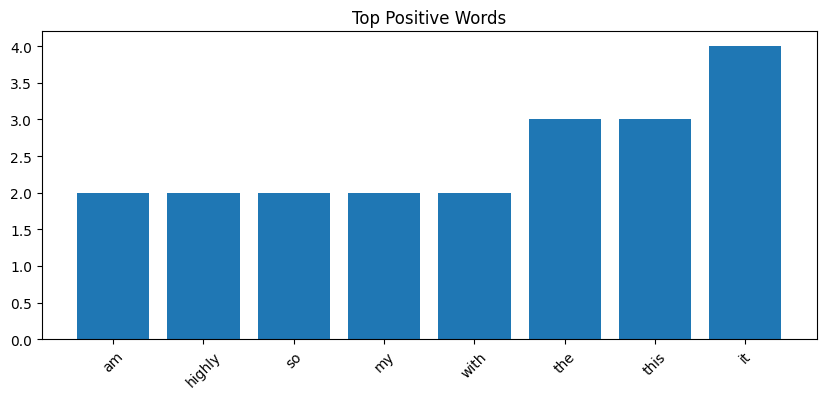

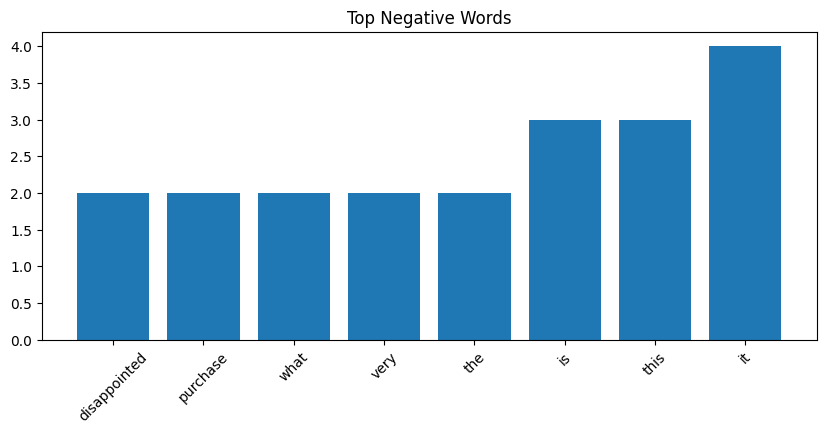

In [32]:
# Positive
top_pos_idx = pos_counts.argsort()[-N:]
plt.figure(figsize=(10, 4))
plt.bar([words[i] for i in top_pos_idx], pos_counts[top_pos_idx])
plt.title("Top Positive Words")
plt.xticks(rotation=45)
plt.show()

# Negative
top_neg_idx = neg_counts.argsort()[-N:]
plt.figure(figsize=(10, 4))
plt.bar([words[i] for i in top_neg_idx], neg_counts[top_neg_idx])
plt.title("Top Negative Words")
plt.xticks(rotation=45)
plt.show()